In [ ]:
pip install opencv-python numpy


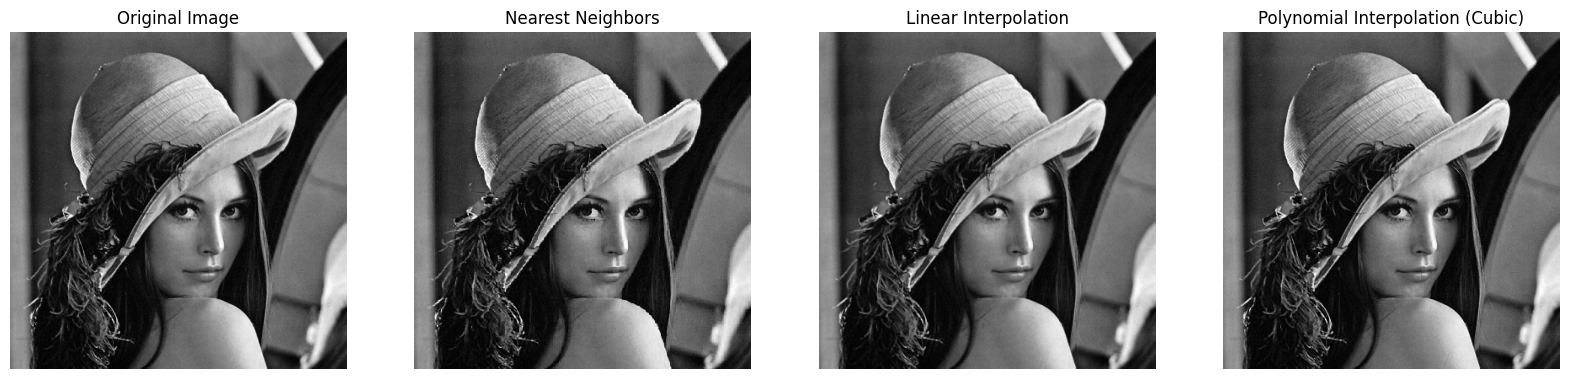

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread('/opencv_transform.jpg')

# Convert the image from BGR (OpenCV format) to RGB for displaying
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Resize image using different interpolation methods
# 1. Nearest Neighbor Interpolation
nearest_img = cv2.resize(image, (400, 400), interpolation=cv2.INTER_NEAREST)

# 2. Linear Interpolation
linear_img = cv2.resize(image, (400, 400), interpolation=cv2.INTER_LINEAR)

# 3. Polynomial Interpolation (Cubic)
polynomial_img = cv2.resize(image, (400, 400), interpolation=cv2.INTER_CUBIC)

# Plot the original and resized images
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Display original image
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')
axs[0].axis('off')

# Display Nearest Neighbors
axs[1].imshow(cv2.cvtColor(nearest_img, cv2.COLOR_BGR2RGB))
axs[1].set_title('Nearest Neighbors')
axs[1].axis('off')

# Display Linear Interpolation
axs[2].imshow(cv2.cvtColor(linear_img, cv2.COLOR_BGR2RGB))
axs[2].set_title('Linear Interpolation')
axs[2].axis('off')

# Display Polynomial Interpolation (Cubic)
axs[3].imshow(cv2.cvtColor(polynomial_img, cv2.COLOR_BGR2RGB))
axs[3].set_title('Polynomial Interpolation (Cubic)')
axs[3].axis('off')

plt.show()


1.2 Image Blurring: Blurring is used to reduce image detail, suppress noise, or create artistic effects. Common techniques include:
1.2	Image blurring
1.2.1	Box blurring
1.2.2	Gaussian blurring
1.2.3	Adaptive blurring


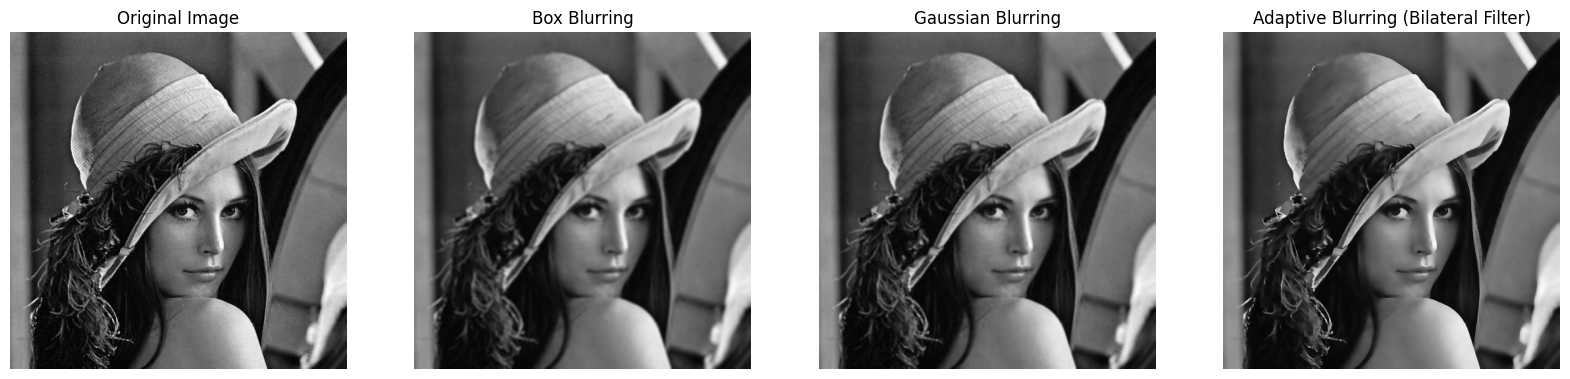

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/opencv_transform.jpg')

# Convert the image from BGR to RGB (OpenCV uses BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 1. Box Blurring (Using a 5x5 kernel)
box_blur = cv2.blur(image, (5, 5))

# 2. Gaussian Blurring
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)

# 3. Adaptive Blurring (Using an adaptive filter)
# Here, we use the bilateral filter for adaptive blurring
adaptive_blur = cv2.bilateralFilter(image, 9, 75, 75)

# Plot the original and blurred images
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Display the original image
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')
axs[0].axis('off')

# Display Box Blurring
axs[1].imshow(cv2.cvtColor(box_blur, cv2.COLOR_BGR2RGB))
axs[1].set_title('Box Blurring')
axs[1].axis('off')

# Display Gaussian Blurring
axs[2].imshow(cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB))
axs[2].set_title('Gaussian Blurring')
axs[2].axis('off')

# Display Adaptive Blurring (Bilateral Filter)
axs[3].imshow(cv2.cvtColor(adaptive_blur, cv2.COLOR_BGR2RGB))
axs[3].set_title('Adaptive Blurring (Bilateral Filter)')
axs[3].axis('off')

plt.show()


Task 2

In [ ]:
pip install scikit-learn numpy tensorflow matplotlib


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

# Load MNIST dataset using fetch_openml from sklearn
mnist = fetch_openml("mnist_784", version=1)
X = mnist.data
y = mnist.target.astype('int')

# Split data into 80-20 (train-test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(kernel='linear', random_state=42),  # Linear kernel SVM
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Function to perform k-fold cross validation and evaluate the model
def evaluate_model(model, X, y):
    # Define Stratified K-Fold cross-validation
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Perform cross-validation and get accuracy scores
    results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

    # Output mean accuracy score from cross-validation
    print(f"{model.__class__.__name__} Cross-Validation Accuracy: {results.mean() * 100:.2f}%")

    return results.mean()

# Evaluate models with cross-validation
for model_name, model in models.items():
    print(f"Evaluating {model_name} model:")
    evaluate_model(model, X_train, y_train)
    print("-" * 50)

# Train and test using an 80-20 train-test split
print("\nEvaluating on the 80-20 Train-Test Split:")

# Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)
print(f"Naive Bayes Model Accuracy on Test Set: {nb_accuracy * 100:.2f}%")

# SVM Model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f"SVM Model Accuracy on Test Set: {svm_accuracy * 100:.2f}%")

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Model Accuracy on Test Set: {rf_accuracy * 100:.2f}%")


Evaluating Naive Bayes model:
GaussianNB Cross-Validation Accuracy: 54.97%
--------------------------------------------------
Evaluating SVM model:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1750/1750 - 9s - 5ms/step - accuracy: 0.9331 - loss: 0.2328 - val_accuracy: 0.9510 - val_loss: 0.1667
Epoch 2/10
1750/1750 - 6s - 3ms/step - accuracy: 0.9692 - loss: 0.1007 - val_accuracy: 0.9617 - val_loss: 0.1414
Epoch 3/10
1750/1750 - 7s - 4ms/step - accuracy: 0.9785 - loss: 0.0672 - val_accuracy: 0.9646 - val_loss: 0.1398
Epoch 4/10
1750/1750 - 6s - 3ms/step - accuracy: 0.9834 - loss: 0.0559 - val_accuracy: 0.9651 - val_loss: 0.1489
Epoch 5/10
1750/1750 - 10s - 6ms/step - accuracy: 0.9867 - loss: 0.0412 - val_accuracy: 0.9671 - val_loss: 0.1561
Epoch 6/10
1750/1750 - 6s - 4ms/step - accuracy: 0.9891 - loss: 0.0349 - val_accuracy: 0.9629 - val_loss: 0.2238
Epoch 7/10
1750/1750 - 10s - 6ms/step - accuracy: 0.9885 - loss: 0.0391 - val_accuracy: 0.9660 - val_loss: 0.2169
Epoch 8/10
1750/1750 - 8s - 4ms/step - accuracy: 0.9911 - loss: 0.0287 - val_accuracy: 0.9695 - val_loss: 0.1869
Epoch 9/10
1750/1750 - 5s - 3ms/step - accuracy: 0.9927 - loss: 0.0261 - val_accuracy: 0.9699 

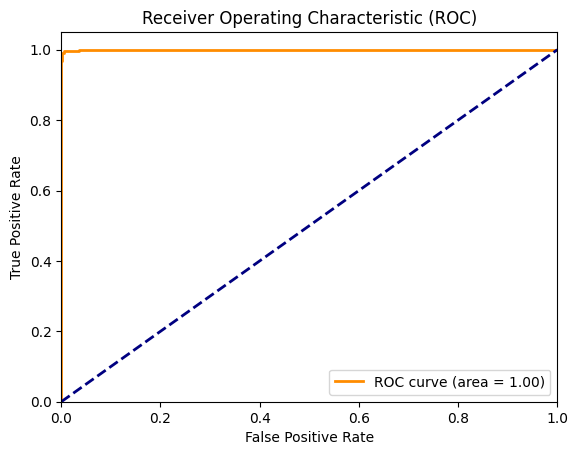

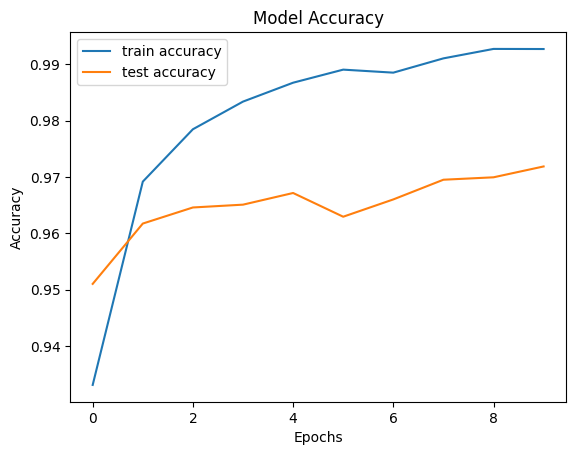

In [1]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

# Load MNIST dataset using fetch_openml from sklearn
mnist = fetch_openml("mnist_784", version=1)
X = mnist.data
y = mnist.target.astype('int')

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encode the labels for ANN
y_encoded = to_categorical(y, num_classes=10)

# Split data into 80-20 (train-test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Define the ANN model
def create_ann_model():
    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))  # 10 classes for MNIST digits
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Train and evaluate the ANN model
ann_model = create_ann_model()

# Train the model
history = ann_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=2)

# Evaluate on the test set
y_pred = ann_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the predicted class labels

# Convert y_test to class labels
y_test_classes = np.argmax(y_test, axis=1)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='macro')
recall = recall_score(y_test_classes, y_pred_classes, average='macro')
f1 = f1_score(y_test_classes, y_pred_classes, average='macro')
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_classes, y_pred[:, 1], pos_label=1)  # Using the probability of class 1 for ROC
roc_auc = auc(fpr, tpr)

# Print the evaluation metrics
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
print("Confusion Matrix:\n", conf_matrix)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Plot Training History (Optional)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='test accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
